(np.float64(-0.5), np.float64(1935.5), np.float64(1215.5), np.float64(-0.5))

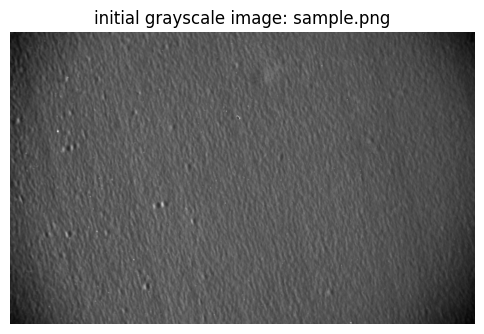

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/1.png'

# grayscale image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"no image found: {image_path}")

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('initial grayscale image: sample.png')
plt.axis('off')

In [6]:
# create parameters for blob
params = cv2.SimpleBlobDetector_Params()

# 1) Grayscale threshold range
params.minThreshold = 10
params.maxThreshold = 200
params.thresholdStep = 10

# 2) Filter based on area
params.filterByArea = True
params.minArea = 50    # Set according to the size of the bump
params.maxArea = 5000  # Set based on large-scale background or shadow situations.

# 3) Filter based on roundness
params.filterByCircularity = False
# params.minCircularity = 0.5

# 4) Filter according to convexity.
params.filterByConvexity = False
# params.minConvexity = 0.7

# 5) Filter according to the ratio of inertia.
params.filterByInertia = False
# params.minInertiaRatio = 0.5

# Create a blob detector
detector = cv2.SimpleBlobDetector_create(params)

# Perform detections
keypoints = detector.detect(img)
print(f"detect {len(keypoints)} Blob.")


detect 93 Blob.


(np.float64(-0.5), np.float64(1935.5), np.float64(1215.5), np.float64(-0.5))

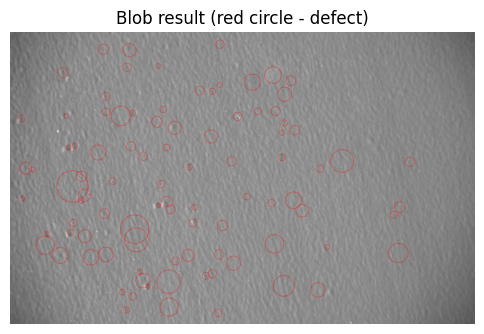

In [9]:
# Draw keys on a greyscale map.
img_with_keypoints = cv2.drawKeypoints(
    img, keypoints, None, (255,0,0),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(6,6))
plt.imshow(img_with_keypoints, cmap='gray')
plt.title('Blob result (red circle - defect)')
plt.axis('off')


Retention after screening 91 Blob (10~100 pixels in diameter).


(np.float64(-0.5), np.float64(1935.5), np.float64(1215.5), np.float64(-0.5))

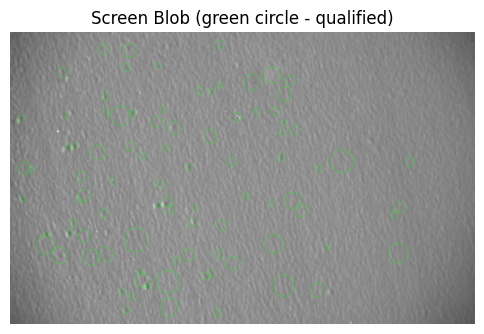

In [10]:
# Filter out blobs that are in the [10, 100] pixel diameter range.
filtered_keypoints = []
for kp in keypoints:
    diameter = kp.size
    if 10 <= diameter <= 100:
        filtered_keypoints.append(kp)

print(f"Retention after screening {len(filtered_keypoints)} Blob (10~100 pixels in diameter).")

# Plot the filtered results
img_filtered = cv2.drawKeypoints(
    img, filtered_keypoints, None, (0,255,0),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.figure(figsize=(6,6))
plt.imshow(img_filtered, cmap='gray')
plt.title('Screen Blob (green circle - qualified)')
plt.axis('off')
